In [1]:
import pandas as pd
import functions as f
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Inistialize data ###

# balance sheet Microsoft
bs_annual_MSFT = pd.read_csv("data/bs_annual_MSFT.csv")
bs_annual_MSFT = f.second_clean(bs_annual_MSFT)

# cashflow Microsoft
cf_annual_MSFT = pd.read_csv("data/cf_annual_MSFT.csv")
cf_annual_MSFT = f.second_clean(cf_annual_MSFT)

# income statement Microsoft
pnl_annual_MSFT = pd.read_csv("data/pnl_annual_MSFT.csv")
pnl_annual_MSFT = f.second_clean(pnl_annual_MSFT)

In [3]:
# Calculating KPIs
pnl_annual_MSFT = f.calculating_kpi_pnl(pnl_annual_MSFT)
pnl_annual_MSFT["insights"] = pnl_annual_MSFT.apply(f.generate_automated_insights,axis=1)

In [4]:
# Creating a previous year file
pnl_annual_MSFT_prev = f.create_prev_year(pnl_annual_MSFT)
bs_annual_MSFT_prev = f.create_prev_year(bs_annual_MSFT)
cf_annual_MSFT_prev = f.create_prev_year(cf_annual_MSFT)

In [5]:
# Creating concatenated files
pnl_concat_MSFT = pd.concat([pnl_annual_MSFT,pnl_annual_MSFT_prev],axis=1)
bs_concat_MSFT = pd.concat([bs_annual_MSFT,bs_annual_MSFT_prev],axis=1)
cf_concat_MSFT = pd.concat([cf_annual_MSFT,cf_annual_MSFT_prev],axis=1)

In [6]:
# Calculating Generating Insights for concatenated files
pnl_concat_MSFT["Previous year insights"] = pnl_annual_MSFT.apply(f.generate_automated_insights,axis=1)

In [7]:
# Creating column for patterns
pnl_concat_MSFT["patterns"] = pnl_concat_MSFT.apply(f.generate_pattern_insights,axis=1)

In [12]:
pnl_concat_MSFT["patterns"]

1     Total Revenue has grown compared to the previo...
2     Total Revenue has grown compared to the previo...
3     Total Revenue has grown compared to the previo...
4     Total Revenue has grown compared to the previo...
5     Total Revenue has grown compared to the previo...
6     Total Revenue has grown compared to the previo...
7     Total Revenue has grown compared to the previo...
8     Total Revenue has grown compared to the previo...
9     Total Revenue has grown compared to the previo...
10    Total Revenue has grown compared to the previo...
11    Total Revenue has grown compared to the previo...
12    Total Revenue has grown compared to the previo...
13                                                     
14                                                     
0                                                      
Name: patterns, dtype: object

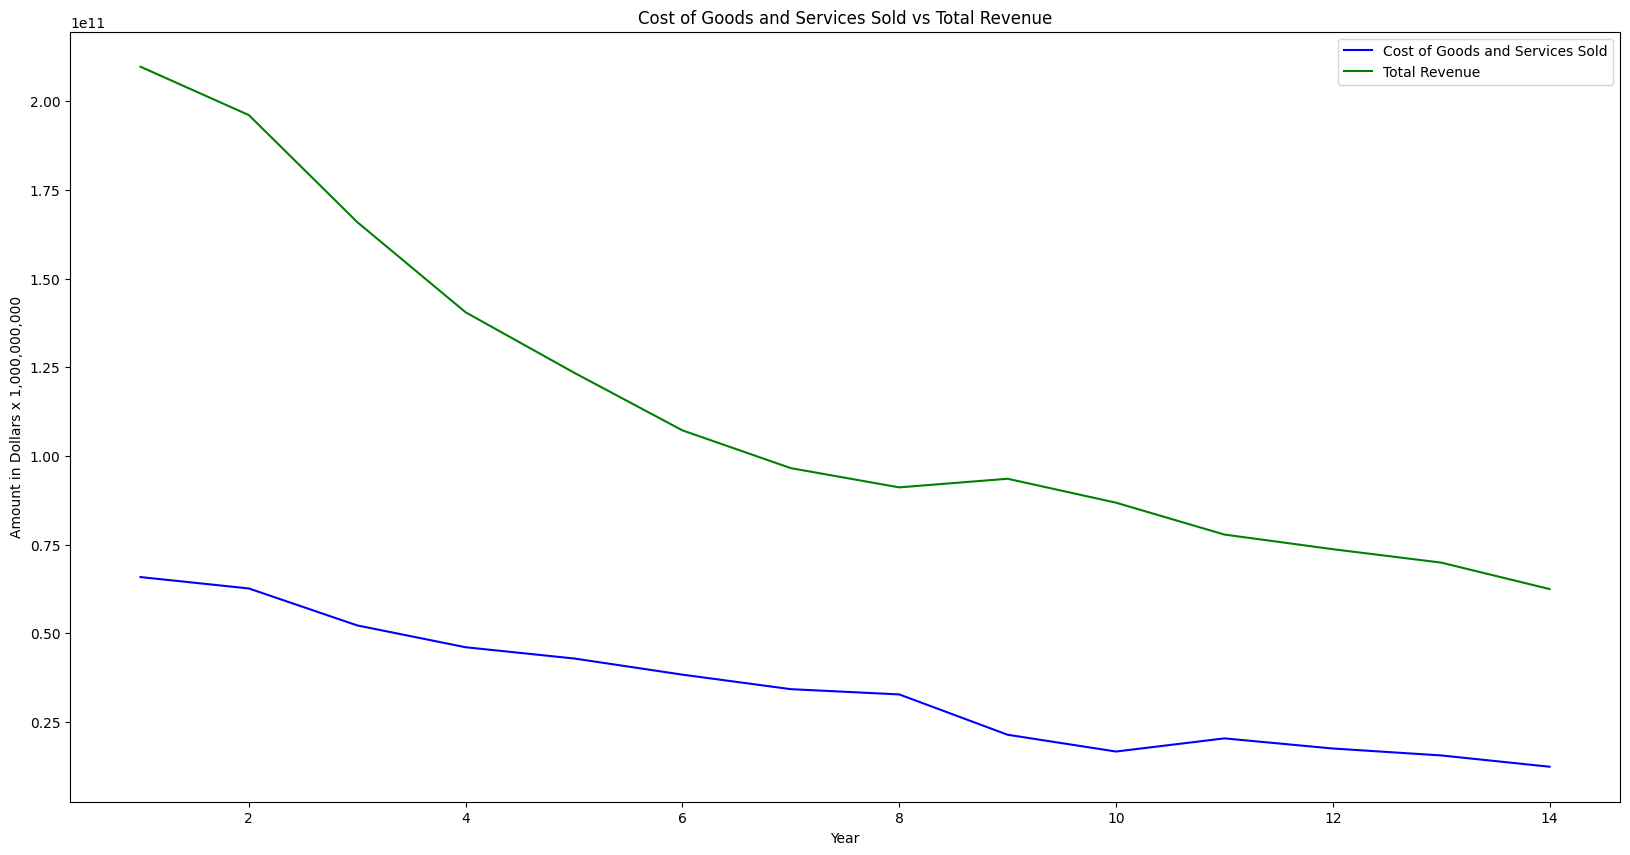

In [10]:
# Create a figure and axis object to plot both lines on the same graph
fig, ax = plt.subplots(figsize=(20, 10))

# Plot COGS
pnl_annual_MSFT["costofGoodsAndServicesSold"].sort_index(ascending=True).plot(
    kind="line",
    ax=ax,
    label="Cost of Goods and Services Sold",
    color='blue'
)

# Plot Total Revenue
pnl_annual_MSFT["totalRevenue"].sort_index(ascending=True).plot(
    kind="line",
    ax=ax,
    label="Total Revenue",
    color='green'
)

# Add titles and labels
ax.set_title("Cost of Goods and Services Sold vs Total Revenue")
ax.set_xlabel("Year")
ax.set_ylabel("Amount in Dollars x 1,000,000,000")
ax.legend()

# Show the plot
plt.show()

<Axes: title={'center': 'totalAssets'}, xlabel='Year', ylabel='Amount in Dollars x 1000000000'>

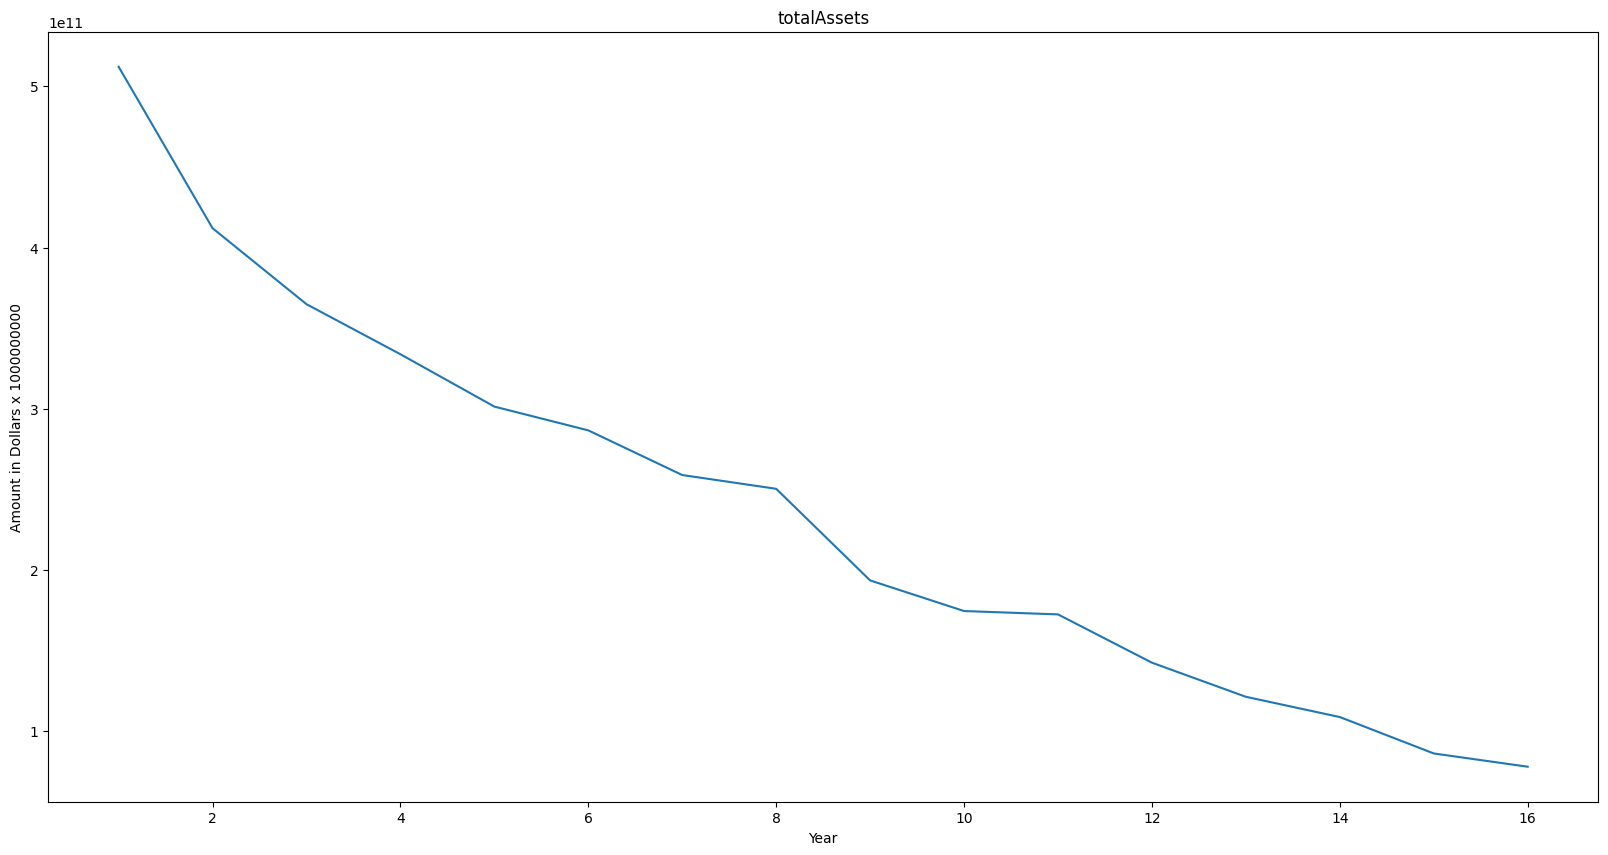

In [11]:
bs_annual_MSFT["totalAssets"].sort_index(ascending=True).plot(kind="line", title="totalAssets", figsize=(20, 10), xlabel="Year",ylabel="Amount in Dollars x 1000000000") 